# Task 2- To Explore Supervised Machine Learning

### To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

What will be predicted score if a student study for 9.25 hrs in a day?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Dataset

In [3]:
data_link = ("http://bit.ly/w-data")
data = pd.read_csv(data_link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Dataset Overview

In [83]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing 
 Checking For Null Values, Missing Values, Shape and Data-type 

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [85]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [86]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploring the PDFs Of Variables

Text(0.5, 1.0, 'Score Dsitribution')

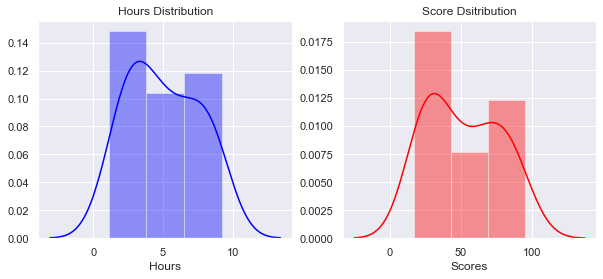

In [87]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p1 = sns.distplot(data['Hours'],label='Hours',color='blue')
plt.title('Hours Distribution')
plt.subplot(1,2,2)
p2 = sns.distplot(data['Scores'],label='Scores',color='red')
plt.title('Score Dsitribution')

# Correlation In Variables 

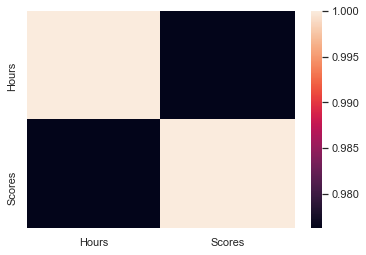

In [88]:
sns.heatmap(data.corr())

AS WE CAN SEE THEY ARE POSITIVELY CORRELATED

# The OLS Assumptions


# 1. Linearity

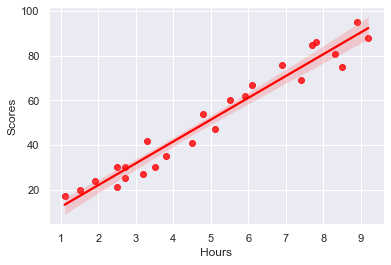

In [89]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')

AS WE SEE THE LINEARITY IN THIS PLOT. HENCE LINEAR.

# 2. Normality And Homoscedasticity

AS WE CAN SEE FROM PDFs OF VARIABLES THAT IT FOLLOWS NORAMLITY AND HOMOSCEDASTICITY

# 3. No Autocorrelation 
AS THE DATASET IS NOT FROM TIME-SERIES OR PANEL DATA, EACH ROW IS DIFFERENT  

# 4. No Multicollinearity 
AS WE ARE PERFORMING SIMPLE LINEAR REGRESSION.

# Declare The Inputs And Targets

In [90]:
x = data.iloc[:, :-1]
y = data.iloc[:, 1]

# Train-Test Split


In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Training The Model

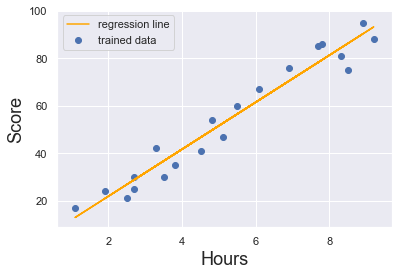

In [92]:
yhat = (reg.coef_*x_train )+reg.intercept_
plt.plot(x_train,yhat,c='orange',label='regression line')
plt.scatter(x_train,y_train,label='trained data')
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.legend()

# 1. Linear Regression Model

In [134]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction 1

In [94]:
prediction1 = reg.predict(x_test)
prediction1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual And Predicted Values

In [95]:
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted1']=prediction1
compare['Deviation']=abs(compare['Actual']-compare['Predicted1'])
compare

,Actual,Predicted1,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


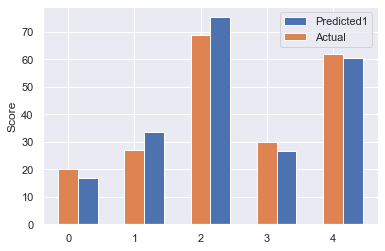

In [96]:
plt.bar(np.arange(5)+0.3,compare.Predicted1,width=0.3,label='Predicted1')
plt.bar(np.arange(5),compare.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

# Visualizing The Deviation 

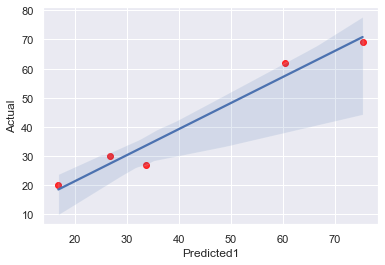

In [97]:
sns.regplot('Predicted1','Actual',data=compare,scatter_kws={'color':'red'})

# Evaluating The Model (Linear) 

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1 = mean_absolute_error(prediction1 , y_test)
RMSE1 = np.sqrt(mean_squared_error(prediction1 , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


# Result (Linear Model)

In [127]:
n = float(input())
Score = reg.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]


# 2 . Ridge Regression Model

In [100]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Prediction 2

In [101]:
prediction2 = ridge.predict(x_test)
prediction2

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

# Comparing Actual and Predicted Values

In [102]:
compare2 = pd.DataFrame({'Actual':y_test,'Predicted2':prediction2})
compare2['Deviation'] = abs(compare2['Actual']-compare2['Predicted2'])
compare2.reset_index(drop=True)


,Actual,Predicted2,Deviation
0,20,17.181700,2.818300
1,27,33.894564,6.894564
2,69,75.185168,6.185168
3,30,27.012796,2.987204
4,62,60.438524,1.561476


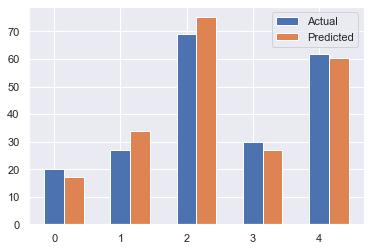

In [135]:
plt.bar(np.arange(5),compare2['Actual'],width=0.3,label='Actual')
plt.bar(np.arange(5)+0.3,compare2['Predicted2'],width=0.3,label='Predicted')
plt.legend()

# Visualizing the Deviation 

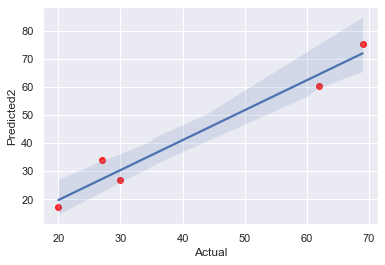

In [103]:
sns.regplot('Actual','Predicted2',data=compare2,scatter_kws={'color':'red'})

# Evaluating The Model (Ridge)

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE2 = mean_absolute_error(prediction2, y_test)
RMSE2 = np.sqrt(mean_squared_error(prediction2 , y_test))
print('Mean Absolute Error = ',MAE2.round(3))
print('Root Mean Squared Error = ',RMSE2.round(3))

Mean Absolute Error =  4.089
Root Mean Squared Error =  4.585


# Result (Ridge)

In [126]:
n = float(input())
Score = ridge.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.37]


# 3. Lasso Model 

In [107]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Prediction 3

In [108]:
Prediction3 = Lasso.predict(x_test)
Prediction3

array([17.48947948, 34.06244335, 75.00741292, 27.23828176, 60.3842095 ])

# Comparing Actual and Predicted Values

In [109]:
compare3 = pd.DataFrame({'Actual':y_test,'Predicted3':Prediction3})
compare3.reset_index(drop=True,inplace=True)
compare3['Deviation'] =abs(compare3['Actual']-compare3['Predicted3'])
compare3

,Actual,Predicted3,Deviation
0,20,17.489479,2.510521
1,27,34.062443,7.062443
2,69,75.007413,6.007413
3,30,27.238282,2.761718
4,62,60.384210,1.615790


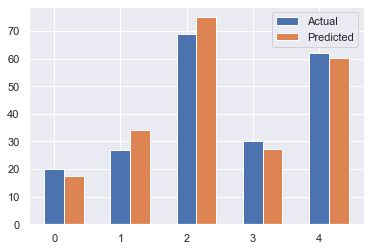

In [136]:
plt.bar(np.arange(5),compare3['Actual'],width=0.3,label='Actual')
plt.bar(np.arange(5)+0.3,compare3['Predicted3'],width=0.3,label='Predicted')
plt.legend()

# Visualizing The Deviation

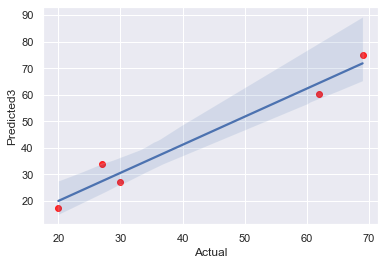

In [110]:
sns.regplot('Actual','Predicted3',data=compare3,scatter_kws={'color':'red'})

# Evaluating the Model (Lasso)

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE3 = mean_absolute_error(Prediction3, y_test)
RMSE3 = np.sqrt(mean_squared_error(Prediction3 , y_test))
print('Mean Absolute Error = ',MAE3.round(3))
print('Root Mean Squared Error = ',RMSE3.round(3))

Mean Absolute Error =  3.992
Root Mean Squared Error =  4.528


# Result (Lasso)

In [125]:
n = float(input())
Score = Lasso.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.04]


# 4. ElasticNet Model

In [114]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=1)
elastic_net.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Prediction 4

In [115]:
prediction4 = elastic_net.predict(x_test)
prediction4

array([19.939207  , 35.39865836, 73.59259703, 29.03300192, 59.95190465])

# Comparing Actual and Predicted Values

In [116]:
compare4 = pd.DataFrame({'Actual':y_test,'Predicted4':prediction4})
compare4.reset_index(drop=True,inplace=True)
compare4['Deviation']= abs(compare4['Actual']-compare4['Predicted4'])
compare4

,Actual,Predicted4,Deviation
0,20,19.939207,0.060793
1,27,35.398658,8.398658
2,69,73.592597,4.592597
3,30,29.033002,0.966998
4,62,59.951905,2.048095


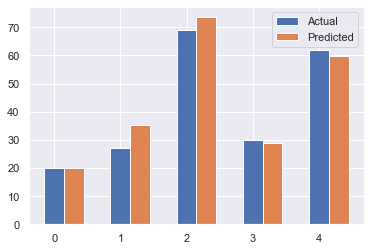

In [137]:
plt.bar(np.arange(5),compare4['Actual'],width=0.3,label='Actual')
plt.bar(np.arange(5)+0.3,compare4['Predicted4'],width=0.3,label='Predicted')
plt.legend()

# Visualizing the Deviation

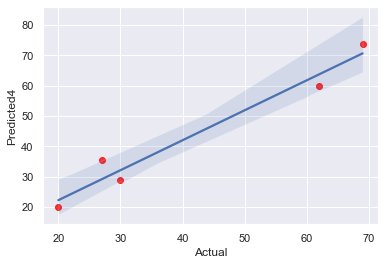

In [117]:
sns.regplot('Actual','Predicted4',data=compare4,scatter_kws={'color':'red'})

# Evaluating the Model (ElastiNet)

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE4 = mean_absolute_error(prediction4, y_test)
RMSE4 = np.sqrt(mean_squared_error(prediction4 , y_test))
print('Mean Absolute Error = ',MAE4.round(3))
print('Root Mean Squared Error = ',RMSE4.round(3)) 

Mean Absolute Error =  3.213
Root Mean Squared Error =  4.399


# Result (ElasticNet)

In [124]:
n = float(input())
Score = elastic_net.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[90.42]


# Comparing Different Models

In [121]:
final = pd.DataFrame({'Actual':y_test})
final.reset_index(drop=True,inplace=True)
final['LinearRegression'] = prediction1
final['Ridge'] = prediction2
final['Lasso'] = Prediction3
final['Elasticnet'] = prediction4
final

,Actual,LinearRegression,Ridge,Lasso,Elasticnet
0,20,16.884145,17.181700,17.489479,19.939207
1,27,33.732261,33.894564,34.062443,35.398658
2,69,75.357018,75.185168,75.007413,73.592597
3,30,26.794801,27.012796,27.238282,29.033002
4,62,60.491033,60.438524,60.384210,59.951905


# Final Evaluation b/w Models

In [122]:
MAE = pd.DataFrame(index = np.arange(1,5))
MAE['Models'] = 'Linear','Ridge','Lasso','ElasticNet'
MAE['MEAN ABSOLUTE ERROR'] = MAE1,MAE1,MAE3,MAE4
MAE

,Models,MEAN ABSOLUTE ERROR
1,Linear,4.183860
2,Ridge,4.183860
3,Lasso,3.991577
4,ElasticNet,3.213428


AS WE CAN SEE ELASTICNET MODEL HAS THE LOWEST MEAN ABSOLUTE ERROR WHICH INDICATES THAT IT IS THE MOST ACCURATE MODEL THAN OTHERS.

# Finalized Model (ElasticNet)
# RESULT

In [123]:
n = float(input())
Score = elastic_net.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[90.42]
